## Example basic classification
Using keras for a classification problem

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


Ahora vamos a cargar los datos que provienen de la base de datos de Zalando

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

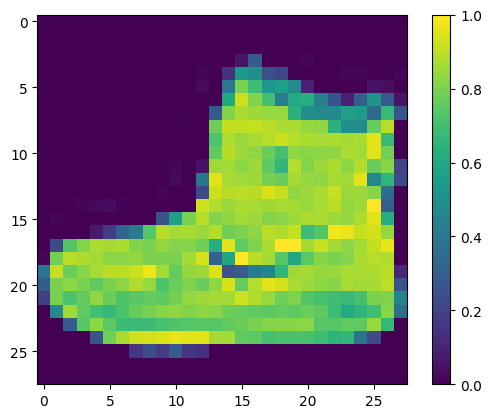

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

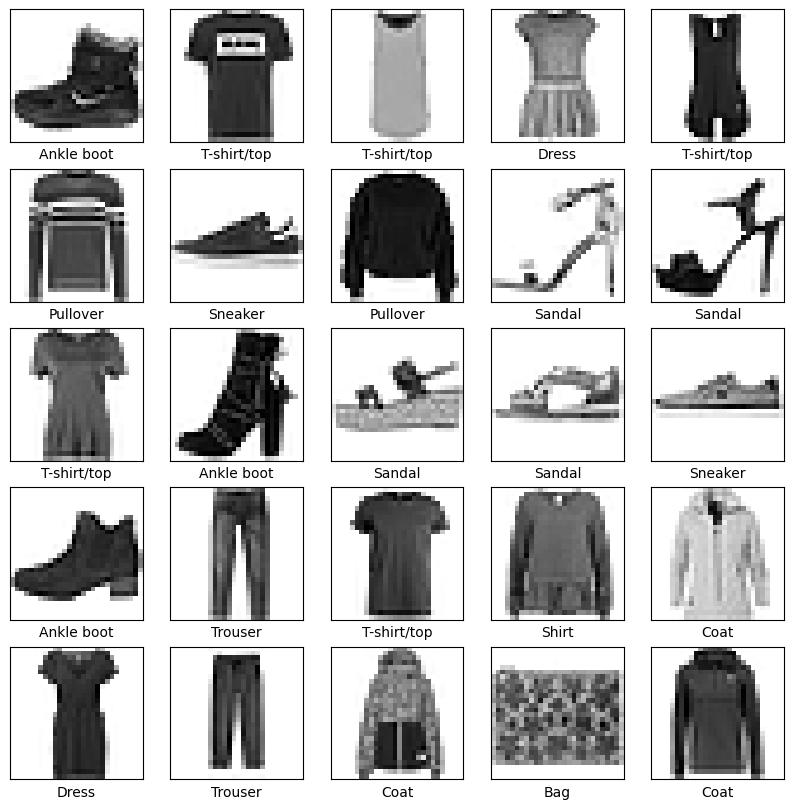

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Creamos el modelo utilizando la clase Sequential y capas de tipo Flatten y Dense

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#    name='Adam')

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4979 - accuracy: 0.8258
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3357 - accuracy: 0.8772
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3117 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2960 - accuracy: 0.8903


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3380 - accuracy: 0.8816
Test accuracy: 0.881600022315979


Creamos el modelo predictivo

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[12]

array([1.3145674e-05, 2.4951898e-08, 5.3209601e-06, 7.1407612e-06,
       1.4316022e-06, 6.3929671e-01, 2.0481413e-07, 3.3406493e-01,
       2.6607072e-02, 4.0272494e-06], dtype=float32)

In [ ]:
np.argmax(predictions[12])

5

In [ ]:
class_names[5]

'Sandal'

In [ ]:
test_labels[12]

7

In [ ]:
class_names[test_labels[12]]

'Sneaker'

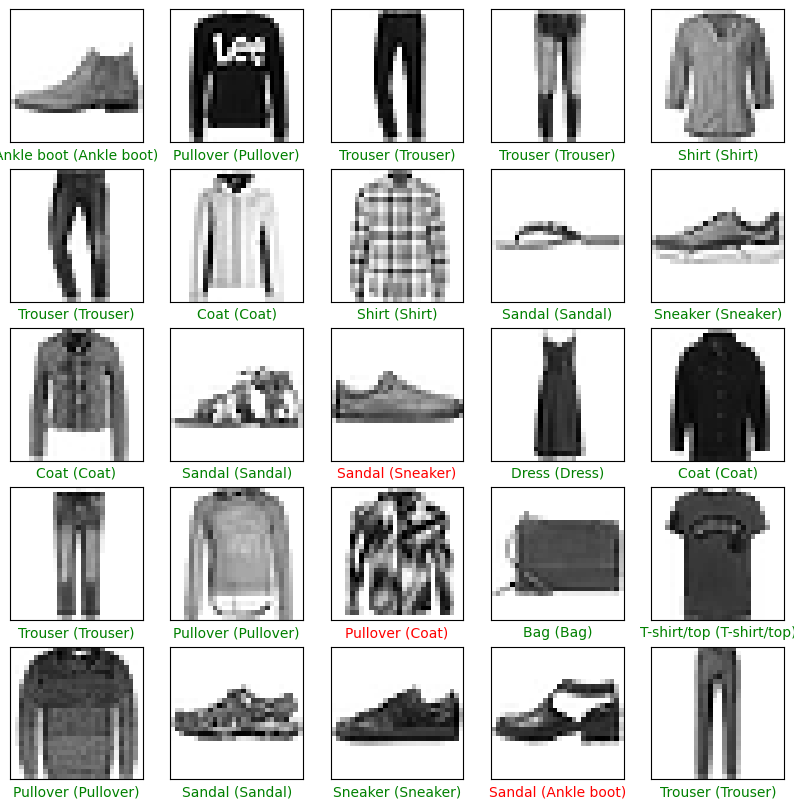

In [ ]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)


In [ ]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

In [ ]:
predictions = model.predict(img)

print(predictions)

In [ ]:
prediction = predictions[0]

np.argmax(prediction)

#Modelo convolucional
Vamos a probar ahora a utilizar un modelo de red neuronal convolucional

In [ ]:
model_conv = keras.Sequential()

model_conv.add(keras.layers.Conv2D(28, kernel_size=(3,3), input_shape = (28, 28, 1)))# Input layer
model_conv.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) # downsizing images
model_conv.add(keras.layers.Flatten()) # images are 3d so have to flatten them into a (1 x 784) vector
model_conv.add(keras.layers.Dense(128, activation=tf.nn.relu, use_bias=True)) # adding a Dense layer of 128 neurons with relu
model_conv.add(keras.layers.Dropout(0.5)) #Implementing dropout regularization with p = 0.5
model_conv.add(keras.layers.Dense(70, activation=tf.nn.relu, use_bias=True))
model_conv.add(keras.layers.Dropout(0.5))
model_conv.add(keras.layers.Dense(10,activation=tf.nn.softmax)) # adding an output layer (with 10 possible outputs for the 10 digits we need to predict)

In [ ]:
model_conv.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_conv.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.6338 - accuracy: 0.7783
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4271 - accuracy: 0.8545
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.3780 - accuracy: 0.8715
Epoch 4/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3508 - accuracy: 0.8782
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3304 - accuracy: 0.8843
Epoch 6/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.3144 - accuracy: 0.8905
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3044 - accuracy: 0.8941
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2907 - accuracy: 0.8995
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.2799 - accuracy: 0.9022
Epoch 10/10
1875/1875 [==============================] - 43s 23m

In [ ]:
test_loss, test_acc = model_conv.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.2892 - accuracy: 0.8999
Test accuracy: 0.8999000191688538


In [ ]:
predictions = model_conv.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [ ]:
class_names[np.argmax(predictions[12])]

'Sneaker'

In [ ]:
class_names[test_labels[12]]

'Sneaker'

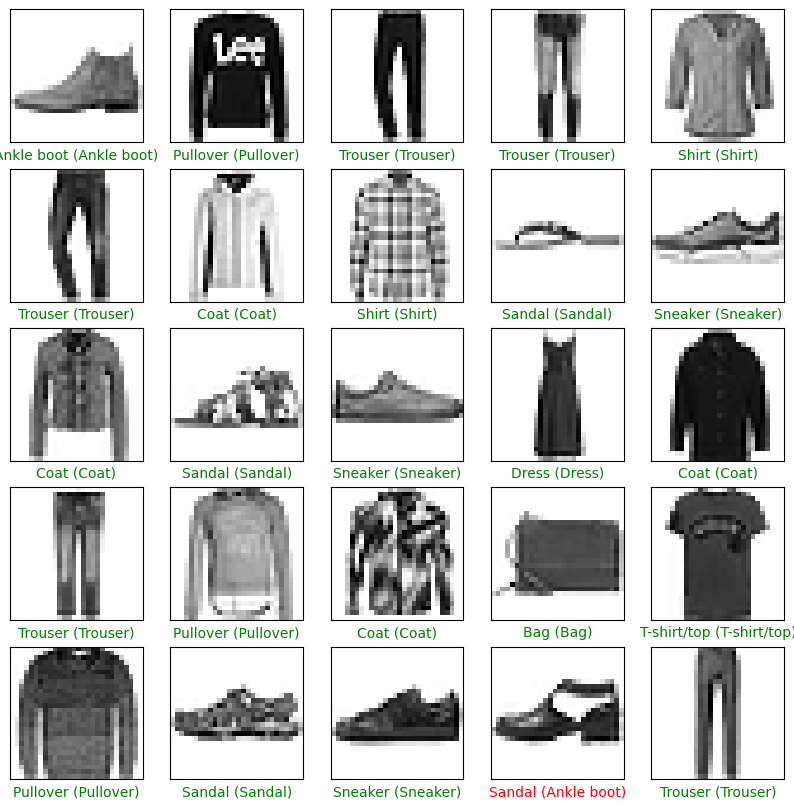

In [ ]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),
                                  color=color)


In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.